# **Youssef Alchaer**
991566623

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.datasets import get_data
dataset = get_data('abalone2')

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera,Shell Weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


In [ ]:
dataset.shape


(4176, 9)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3758, 9)
Unseen Data For Predictions: (418, 9)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Age', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Age
2,Original Data,"(3758, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2630, 10)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='me...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5468,4.8618,2.2036,0.5222,0.1555,0.1312,0.359
lr,Linear Regression,1.6036,4.9748,2.2276,0.5134,0.1641,0.1370,0.287
br,Bayesian Ridge,1.6039,4.9771,2.2282,0.5132,0.1641,0.1371,0.013
lar,Least Angle Regression,1.6043,4.9787,2.2285,0.5130,0.1642,0.1371,0.013
rf,Random Forest Regressor,1.5776,4.9885,2.2318,0.5086,0.1585,0.1344,1.117
ridge,Ridge Regression,1.6093,5.0360,2.2414,0.5075,0.1641,0.1377,0.012
et,Extra Trees Regressor,1.5860,5.0126,2.2371,0.5075,0.1587,0.1350,0.718
huber,Huber Regressor,1.5631,5.1288,2.2611,0.4999,0.1640,0.1291,0.058
lightgbm,Light Gradient Boosting Machine,1.6008,5.1469,2.2670,0.4943,0.1602,0.1351,0.190
knn,K Neighbors Regressor,1.6073,5.2706,2.2933,0.4836,0.1627,0.1351,0.061


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5468,4.8618,2.2036,0.5222,0.1555,0.1312,0.315
lr,Linear Regression,1.6036,4.9748,2.2276,0.5134,0.1641,0.1370,0.022
br,Bayesian Ridge,1.6039,4.9771,2.2282,0.5132,0.1641,0.1371,0.013
lar,Least Angle Regression,1.6043,4.9787,2.2285,0.5130,0.1642,0.1371,0.013
rf,Random Forest Regressor,1.5776,4.9885,2.2318,0.5086,0.1585,0.1344,1.111
ridge,Ridge Regression,1.6093,5.0360,2.2414,0.5075,0.1641,0.1377,0.020
et,Extra Trees Regressor,1.5860,5.0126,2.2371,0.5075,0.1587,0.1350,0.746
huber,Huber Regressor,1.5631,5.1288,2.2611,0.4999,0.1640,0.1291,0.058
lightgbm,Light Gradient Boosting Machine,1.6008,5.1469,2.2670,0.4943,0.1602,0.1351,0.084
knn,K Neighbors Regressor,1.6073,5.2706,2.2933,0.4836,0.1627,0.1351,0.067


INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5468,4.8618,2.2036,0.5222,0.1555,0.1312,0.312
lr,Linear Regression,1.6036,4.9748,2.2276,0.5134,0.1641,0.1370,0.014
br,Bayesian Ridge,1.6039,4.9771,2.2282,0.5132,0.1641,0.1371,0.015
lar,Least Angle Regression,1.6043,4.9787,2.2285,0.5130,0.1642,0.1371,0.014
rf,Random Forest Regressor,1.5776,4.9885,2.2318,0.5086,0.1585,0.1344,1.116
ridge,Ridge Regression,1.6093,5.0360,2.2414,0.5075,0.1641,0.1377,0.014
et,Extra Trees Regressor,1.5860,5.0126,2.2371,0.5075,0.1587,0.1350,0.719
huber,Huber Regressor,1.5631,5.1288,2.2611,0.4999,0.1640,0.1291,0.059
lightgbm,Light Gradient Boosting Machine,1.6008,5.1469,2.2670,0.4943,0.1602,0.1351,0.083
knn,K Neighbors Regressor,1.6073,5.2706,2.2933,0.4836,0.1627,0.1351,0.063


INFO:logs:create_model_container: 54
INFO:logs:master_model_container: 54
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
ada = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5300,4.4292,2.1046,0.5062,0.1541,0.1332
1,1.6537,5.0924,2.2566,0.5562,0.1591,0.1431
2,1.5330,4.5450,2.1319,0.5431,0.1565,0.1331
3,1.7343,6.0420,2.4580,0.5048,0.1708,0.1440
4,1.5256,4.3051,2.0749,0.4408,0.1519,0.1330
5,1.6141,5.1538,2.2702,0.4842,0.1607,0.1360
6,1.6498,5.1323,2.2654,0.5033,0.1750,0.1406
7,1.5183,4.7460,2.1785,0.5809,0.1538,0.1232
8,1.5671,4.7622,2.1823,0.4841,0.1591,0.1358


INFO:logs:create_model_container: 55
INFO:logs:master_model_container: 55
INFO:logs:display_container: 5
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(ada)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [ ]:
tuned_ada = tune_model(ada)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5300,4.4292,2.1046,0.5062,0.1541,0.1332
1,1.6537,5.0924,2.2566,0.5562,0.1591,0.1431
2,1.5330,4.5450,2.1319,0.5431,0.1565,0.1331
3,1.7343,6.0420,2.4580,0.5048,0.1708,0.1440
4,1.5256,4.3051,2.0749,0.4408,0.1519,0.1330
5,1.6141,5.1538,2.2702,0.4842,0.1607,0.1360
6,1.6498,5.1323,2.2654,0.5033,0.1750,0.1406
7,1.5183,4.7460,2.1785,0.5809,0.1538,0.1232
8,1.5671,4.7622,2.1823,0.4841,0.1591,0.1358


INFO:logs:create_model_container: 56
INFO:logs:master_model_container: 56
INFO:logs:display_container: 6
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_ada)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [ ]:
dt = create_model('dt')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1027,9.0837,3.0139,-0.0127,0.2120,0.1838
1,2.1331,10.2548,3.2023,0.1063,0.2196,0.1799
2,2.0190,8.7034,2.9502,0.1251,0.2071,0.1720
3,2.1939,9.8745,3.1424,0.1906,0.2179,0.1866
4,2.1635,10.2471,3.2011,-0.3311,0.2176,0.1821
5,1.9506,7.8973,2.8102,0.2096,0.1982,0.1649
6,2.0456,8.6464,2.9405,0.1632,0.2030,0.1743
7,1.9430,7.6844,2.7721,0.3215,0.1955,0.1540
8,2.2205,10.2814,3.2065,-0.1137,0.2258,0.1956


INFO:logs:create_model_container: 57
INFO:logs:master_model_container: 57
INFO:logs:display_container: 7
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5019,4.9106,2.2160,0.4525,0.1604,0.1268
1,1.6274,5.9544,2.4402,0.4811,0.1701,0.1370
2,1.5456,5.1416,2.2675,0.4832,0.1647,0.1286
3,1.6977,6.4439,2.5385,0.4718,0.1753,0.1354
4,1.5000,5.1625,2.2721,0.3294,0.1604,0.1231
5,1.5323,5.6198,2.3706,0.4375,0.1662,0.1240
6,1.6578,6.1274,2.4754,0.4070,0.1730,0.1330
7,1.6274,6.5399,2.5573,0.4225,0.1766,0.1248
8,1.4525,5.0342,2.2437,0.4547,0.1665,0.1243


INFO:logs:create_model_container: 58
INFO:logs:master_model_container: 58
INFO:logs:display_container: 8
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [ ]:
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5636,4.6496,2.1563,0.4816,0.1568,0.1360
1,1.6019,5.3058,2.3034,0.5376,0.1577,0.1371
2,1.4965,4.4432,2.1079,0.5534,0.1527,0.1277
3,1.7175,5.9186,2.4328,0.5149,0.1676,0.1426
4,1.5708,4.8280,2.1973,0.3728,0.1562,0.1335
5,1.6189,5.1637,2.2724,0.4832,0.1598,0.1350
6,1.5957,5.1269,2.2643,0.5038,0.1593,0.1323
7,1.5849,5.2801,2.2978,0.5338,0.1584,0.1261
8,1.6377,5.3841,2.3204,0.4168,0.1691,0.1438


INFO:logs:create_model_container: 59
INFO:logs:master_model_container: 59
INFO:logs:display_container: 9
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6540,4.9520,2.2253,0.4479,0.1637,0.1448
1,1.6537,5.4662,2.3380,0.5236,0.1616,0.1424
2,1.5164,4.7215,2.1729,0.5254,0.1588,0.1304
3,1.7328,5.8597,2.4207,0.5197,0.1686,0.1457
4,1.6564,5.2437,2.2899,0.3188,0.1638,0.1421
5,1.7158,5.6231,2.3713,0.4372,0.1696,0.1452
6,1.5883,5.1878,2.2777,0.4979,0.1619,0.1326
7,1.6298,5.4394,2.3322,0.5197,0.1610,0.1295
8,1.7625,5.8394,2.4165,0.3674,0.1783,0.1556


INFO:logs:create_model_container: 60
INFO:logs:master_model_container: 60
INFO:logs:display_container: 10
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_lightgbm)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


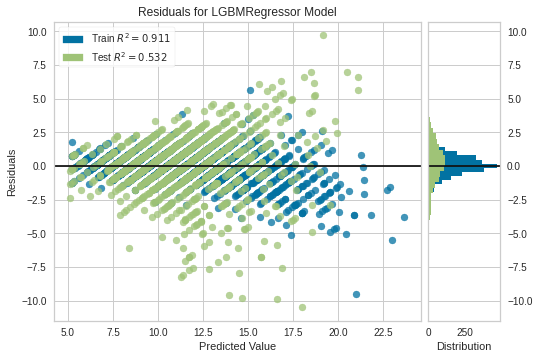

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)


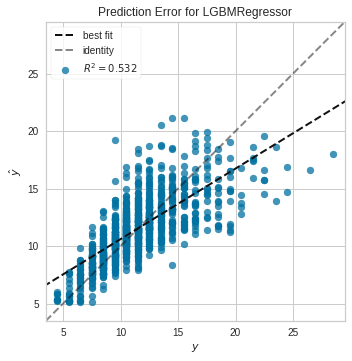

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'error')


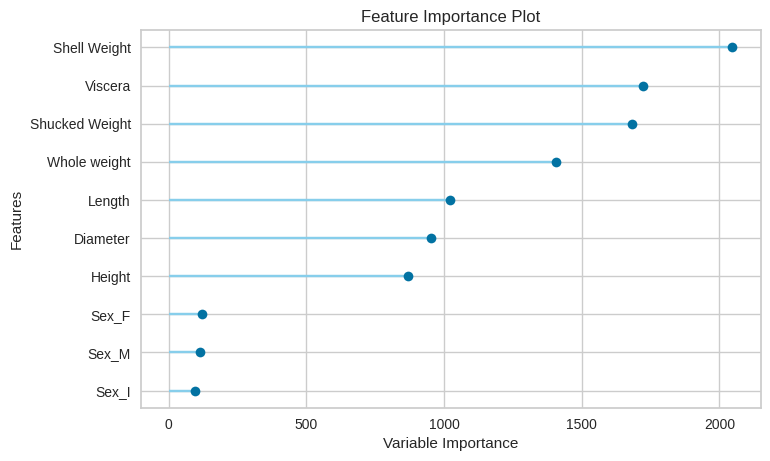

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')
